In [1]:
import numpy as np
import pandas as pd

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

from tqdm import tqdm
import os

In [2]:
# Paths for data.
Ravdess = "data/RAVDESS/"
Tess = "data/TESS/"


RAVDESS

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
speaker = []

for directory in tqdm(ravdess_directory_list):
    if 'DS_Store' in directory:
        continue
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + directory)
    for file in actor:
        if 'DS_Store' in file:
            continue
        
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + directory + '/' + file)
        speaker.append(part[-1])
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for speaker of files
speaker_df = pd.DataFrame(speaker, columns=['Speaker'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, speaker_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()


100%|██████████| 25/25 [00:00<00:00, 1155.58it/s]


,Emotions,Speaker,Path
0,angry,16,data/RAVDESS/Actor_16/03-01-05-01-02-01-16.wav
1,fear,16,data/RAVDESS/Actor_16/03-01-06-01-02-02-16.wav
2,fear,16,data/RAVDESS/Actor_16/03-01-06-02-01-02-16.wav
3,angry,16,data/RAVDESS/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,16,data/RAVDESS/Actor_16/03-01-07-01-01-01-16.wav


TESS

In [4]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []
speaker = []

for directory in tqdm(tess_directory_list):
    if 'DS_Store' in directory:
        continue
    
    directories = os.listdir(Tess + directory)
    for file in directories:
        if 'DS_Store' in file:
            continue
        
        part = file.split('.')[0]
        part = part.split('_')
        if part[2]=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part[2])
        file_path.append(Tess + directory + '/' + file)
        speaker.append(part[0][0])
        
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for speaker of files
speaker_df = pd.DataFrame(speaker, columns=['Speaker'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, speaker_df, path_df], axis=1)
Tess_df.head()

100%|██████████| 15/15 [00:00<00:00, 461.99it/s]


,Emotions,Speaker,Path
0,disgust,Y,data/TESS/YAF_disgust/YAF_date_disgust.wav
1,disgust,Y,data/TESS/YAF_disgust/YAF_rag_disgust.wav
2,disgust,Y,data/TESS/YAF_disgust/YAF_raise_disgust.wav
3,disgust,Y,data/TESS/YAF_disgust/YAF_ditch_disgust.wav
4,disgust,Y,data/TESS/YAF_disgust/YAF_door_disgust.wav


In [5]:
Tess_df.shape

(2800, 3)

In [6]:
Ravdess_df.shape

(1440, 3)

In [7]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Speaker,Path
0,angry,16,data/RAVDESS/Actor_16/03-01-05-01-02-01-16.wav
1,fear,16,data/RAVDESS/Actor_16/03-01-06-01-02-02-16.wav
2,fear,16,data/RAVDESS/Actor_16/03-01-06-02-01-02-16.wav
3,angry,16,data/RAVDESS/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,16,data/RAVDESS/Actor_16/03-01-07-01-01-01-16.wav


In [8]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

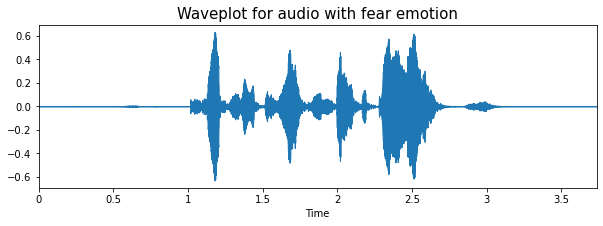

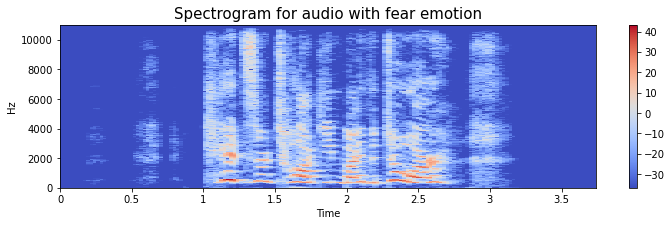

In [9]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

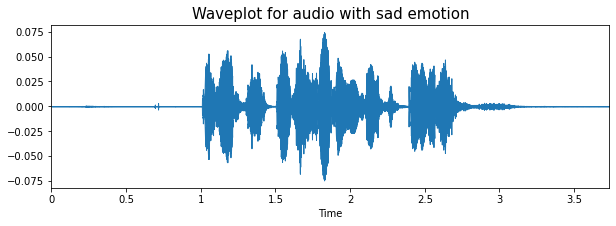

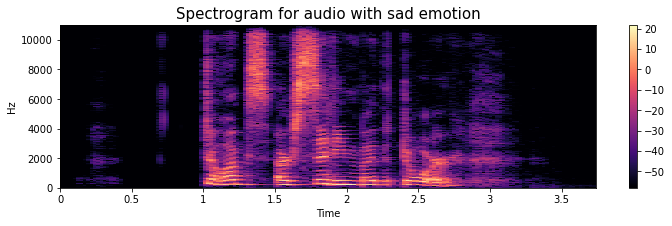

In [45]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

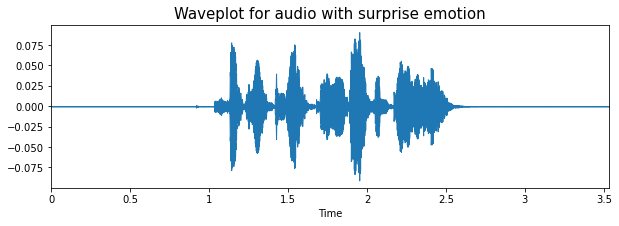

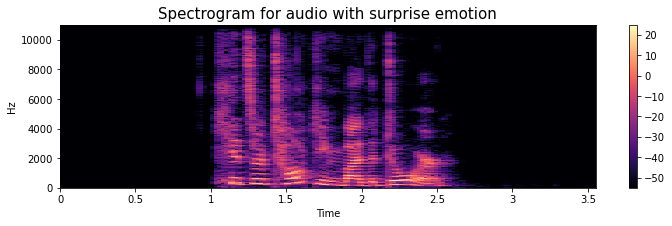

In [46]:
emotion='surprise'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

Data Augmenatation

In [10]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

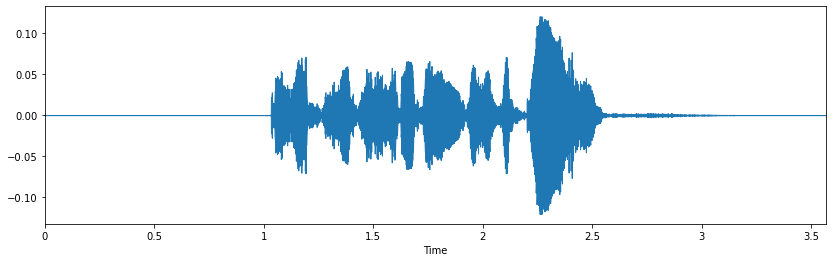

In [11]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

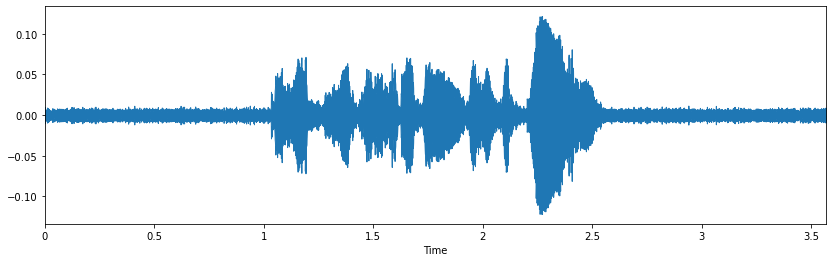

In [12]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

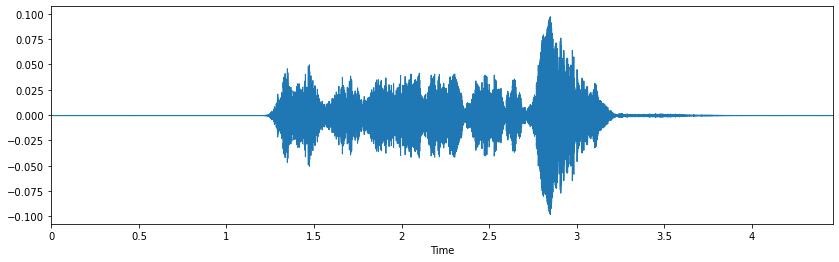

In [13]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

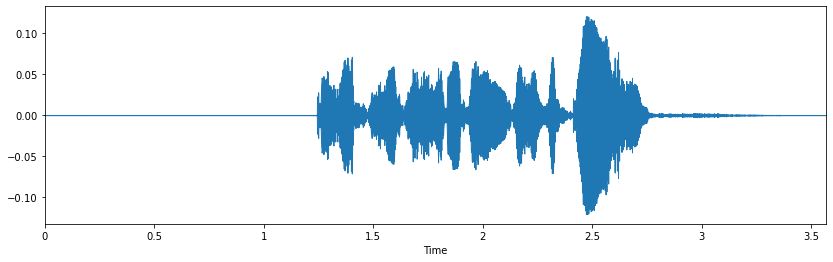

In [14]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

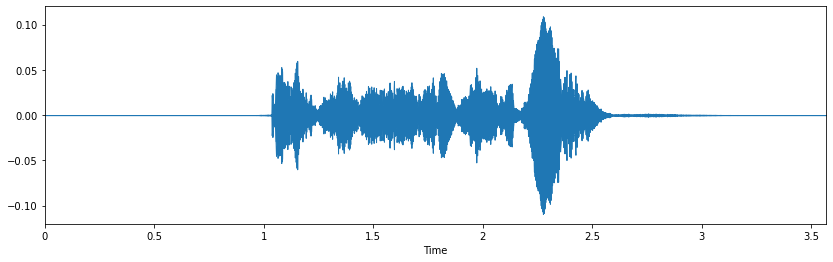

In [15]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Feature Extraction

In [16]:
data_path.head()

,Emotions,Speaker,Path
0,angry,16,data/RAVDESS/Actor_16/03-01-05-01-02-01-16.wav
1,fear,16,data/RAVDESS/Actor_16/03-01-06-01-02-02-16.wav
2,fear,16,data/RAVDESS/Actor_16/03-01-06-02-01-02-16.wav
3,angry,16,data/RAVDESS/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,16,data/RAVDESS/Actor_16/03-01-07-01-01-01-16.wav


In [53]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    #data with shift
    shft_data = shift(data)
    res4 = extract_features(shft_data)
    result = np.vstack((result, res4))
    
    return result


In [30]:
data_path.iloc[1].Path

'data/RAVDESS/Actor_16/03-01-06-01-02-02-16.wav'

In [35]:
res = get_features(data_path.iloc[1].Path)

In [37]:
data, sample_rate = librosa.load(data_path.iloc[1].Path, duration=2.5, offset=0.6)

In [39]:
data.shape

(55125,)

In [40]:
sample_rate

22050

In [41]:
res1 = extract_features(data)
result = np.array(res1)

In [43]:
result.shape

(162,)

In [44]:
zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)

In [45]:
zcr

array([0.18748192])

In [47]:
stft = np.abs(librosa.stft(data))
chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)

In [49]:
chroma_stft.shape

(12,)

In [51]:
mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
mfcc.shape

(20,)

In [52]:
mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
mel.shape

(128,)

In [54]:
X, Y, Speakers = [], [], []
for path, emotion, speaker in tqdm(zip(data_path.Path, data_path.Emotions, data_path.Speaker)):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
        Speakers.append(speaker)

4240it [15:41,  4.51it/s]


In [55]:
len(X), len(Y), len(Speakers), data_path.Path.shape

(16960, 16960, 16960, (4240,))

In [56]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features['speakers'] = Speakers
Features.to_csv('features_6.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,labels,speakers
0,0.197627,0.514769,0.462725,0.483974,0.550155,0.527827,0.602659,0.542944,0.526867,0.601704,...,0.004046,0.004867,0.004637,0.005740,0.005929,0.004316,0.002451,0.000105,angry,16
1,0.273858,0.611349,0.571728,0.583068,0.630831,0.609095,0.654818,0.569522,0.580061,0.662088,...,0.004110,0.004971,0.004716,0.005840,0.006039,0.004411,0.002556,0.000186,angry,16
2,0.222457,0.619763,0.514279,0.473754,0.490669,0.522670,0.509022,0.613258,0.523150,0.546612,...,0.002275,0.000955,0.000806,0.000889,0.000870,0.001011,0.000293,0.000015,angry,16
3,0.194340,0.523887,0.468341,0.487945,0.554135,0.532771,0.608631,0.549724,0.534897,0.609857,...,0.004046,0.004867,0.004637,0.005740,0.005929,0.004316,0.002451,0.000105,angry,16
4,0.187482,0.552680,0.513854,0.478973,0.428035,0.378610,0.395914,0.405448,0.433424,0.497569,...,0.002958,0.003861,0.003163,0.002973,0.002537,0.002107,0.000781,0.000050,fear,16
